In [1]:
import glob
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import json
from collections import Counter

%matplotlib inline

In [2]:
input_file_root = "outputs/doc_*.jsonl"
doc_list = []
for file in tqdm(glob.glob(input_file_root)):
    with open(file, "r") as f:
        for line in f:
            doc_list.append(json.loads(line))

100%|██████████| 24/24 [00:28<00:00,  1.20s/it]


In [3]:
# journal_title_list = [doc["infons"]["journal-title"] for doc in doc_list]
# journal_title_list = []
# for doc in passage_list:
# journal_title_counter = Counter(journal_title_list)
# for journal_title, count in journal_title_counter.most_common():
#     if count > 100:
#         print(journal_title, count)

doc_list_filtered = []
for doc in doc_list:
    if "journal" in doc["infons"]:
        journal_title = doc["infons"]["journal"].split(";")[0]
        if journal_title == "Nature":
            doc_list_filtered.append(doc)
print(len(doc_list_filtered))

10498


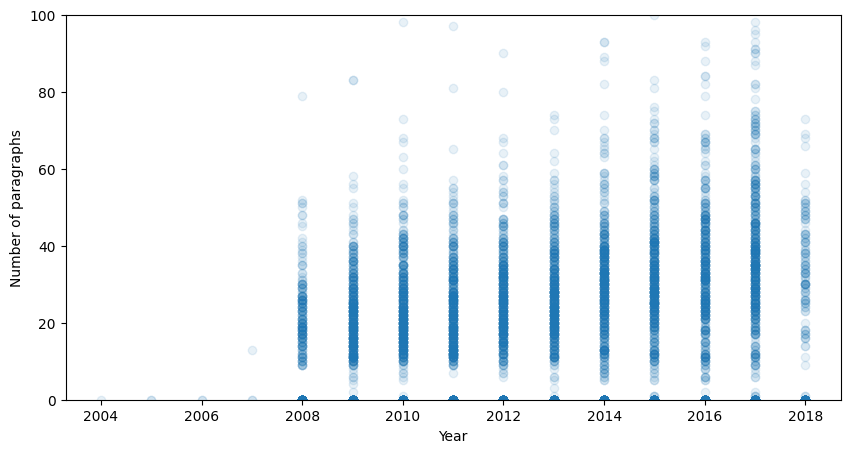

In [28]:
year_passages_list = [(int(doc["infons"]["year"]), len(doc["passages"])) for doc in doc_list_filtered]
# print 10-th percentile of the number of paragraphs
# print(np.percentile(num_paragraph_list, np.linspace(0, 100, 11)))
# plot scatter plot
fig = plt.figure(figsize=(10, 5))
X, Y = zip(*year_passages_list)
plt.scatter(X, Y, alpha=0.1)
plt.xlabel("Year")
plt.ylabel("Number of paragraphs")
plt.ylim(0, 100)
plt.show()

[1.000e+00 4.300e+01 7.000e+01 8.900e+01 1.070e+02 1.260e+02 1.460e+02
 1.700e+02 2.000e+02 2.470e+02 2.406e+03]
[ 80. 247.]


/tmp/ipykernel_2003527/2069091503.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(passages_length_list, kde=False, rug=False)


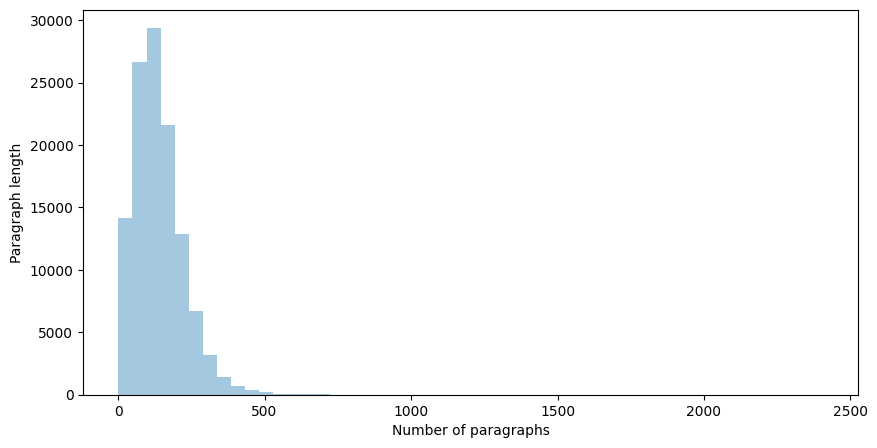

In [57]:
passages_length_list = sum([[len(para["content"].split(' ')) for para in doc["passages"]] for doc in doc_list_filtered], [])
# print 10-th percentile of passages_length_list
print(np.percentile(passages_length_list, np.linspace(0, 100, 11)))
print(np.percentile(passages_length_list, [25, 90]))

fig = plt.figure(figsize=(10, 5))
# X, Y = zip(*passages_length_list)
# plt.scatter(X, Y, alpha=0.1)
# barplot of passages_length_list
sns.distplot(passages_length_list, kde=False, rug=False)
plt.xlabel("Number of paragraphs")
plt.ylabel("Paragraph length")
# plt.ylim(0, 1000)
plt.show()


In [20]:
# import pprint
# for doc in doc_list_filtered:
#     if len(doc["passages"]) == 20:
#         pprint.pprint(doc)
#         break

In [56]:
import random

min_len = 75
max_len = 250

task_list = []

para_list_filtered = sum(
    [doc["passages"] for doc in doc_list_filtered if len(doc["passages"]) > 10], 
    []
)
para_list_filtered = [p for p in para_list_filtered if min_len < len(p["content"].split()) < max_len]
print(f"Number of paragraphs: {len(para_list_filtered)}")

Number of paragraphs: 78333


In [58]:
# save paragraphs to file
output_file = "outputs/paragraphs.jsonl"
with open(output_file, "w") as f:
    for para in para_list_filtered:
        f.write(json.dumps(para) + "\n")